In [2]:
%matplotlib inline
import research_kit_bottom_trend_follow as rk

merged_results = rk.get_joined_params_and_summary()

normal_results = merged_results.query("inverse_trading == False")
inversed_results = merged_results.query("inverse_trading == True")

bot = rk.BottomTrendFollow(db_client=rk.mysql_client, exchange_client=rk.bitmex_exchange_client, is_backtest=True)

data loaded


In [16]:
def visualize_timeframe_clusters_with_xy_for_each_param(df, timeframe, figure_title, x_axis, y_axis):
    rk.plt.rcParams['figure.figsize'] = (20.0, 20.0)
    figure_timeframe1_cluster_for_each_param = rk.plt.figure()
    figure_timeframe1_cluster_for_each_param.suptitle(figure_title, fontsize=16, y=1.01)
    
    bottom_trend_tick_params = [5,10,15,20,25,30,35,40,45,50]
    middle_trend_tick_params = [3,5,7,9,12,15,18,21,24,27,30]
    top_trend_tick_params = [1,2,3,4,5,6,7,8]
    
    trend_tick_params = {
        "bottom_trend_tick": bottom_trend_tick_params,
        "middle_trend_tick": middle_trend_tick_params,
        "top_trend_tick": top_trend_tick_params
    }
    
    i = 1
    
    for trend, tick_params in trend_tick_params.items():
        graph = figure_timeframe1_cluster_for_each_param.add_subplot(3,1,i)
        graph.set_title("clustering in timeframe " + str(timeframe) + " with " + trend)
        graph.set_xlabel(x_axis)
        graph.set_ylabel(y_axis)
        for tick_param in tick_params:
            graph.scatter(df[(df.timeframe == timeframe) & (df[trend] == tick_param)][x_axis],
                          df[(df.timeframe == timeframe) & (df[trend] == tick_param)][y_axis],
                          alpha=0.5,linewidths="1", label=trend +":" + str(tick_param),
                          color=(tick_param/rk.np.max(tick_params),0,1-tick_param/rk.np.max(tick_params)))
            graph.legend()
        i += 1
            
    #print(df.head(10))
    #print(df.tail(10))
    
    figure_timeframe1_cluster_for_each_param.tight_layout()
    figure_timeframe1_cluster_for_each_param.show()

In [30]:
def pickup_top_tick_with_xy(df, timeframe, figure_title, pick_up_array, x_axis, y_axis, separate=False):
    figure_top = rk.plt.figure()
    figure_top.suptitle(figure_title, fontsize=16, y=1.01)
    
    top_trend_tick_params = [1,2,3,4,5,6,7,8]
    
    picked_df_array = []
    for tick_param in pick_up_array:
        picked_df_array.append(df[(df.timeframe == timeframe) & (df["top_trend_tick"] == tick_param)])
        
    picked_df = rk.pd.concat(picked_df_array)
    rk.plt.rcParams['figure.figsize'] = (20.0, 20.0)
    
    linear_model = rk.linear_model.LinearRegression()
    
    rk.plt.rcParams['figure.figsize'] = (20.0, len(pick_up_array)*5.0)
    
    for i, tick_param in enumerate(pick_up_array):
        if separate:
            graph = figure_top.add_subplot(len(pick_up_array), 1, i+1)
        else:
            graph = figure_top.add_subplot(1, 1, 1)
            rk.plt.rcParams['figure.figsize'] = (20.0, 6.66*(len(pick_up_array)))
      
        x = picked_df[picked_df["top_trend_tick"] == tick_param][x_axis]
        y = picked_df[picked_df["top_trend_tick"] == tick_param][y_axis]
        linear_model.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))
        
        graph.set_title("timeframe: 1, top_trend_tick: " + str(tick_param))
        graph.set_xlabel(x_axis)
        graph.set_ylabel(y_axis)
        graph.set_xlim(picked_df[x_axis].min(), picked_df[x_axis].max())
        graph.set_ylim(picked_df[y_axis].min(), picked_df[y_axis].max())
        graph.scatter(x, y,alpha=0.5,linewidths="1", label="top_trend_tick :" + str(tick_param),
            color=(tick_param/rk.np.max(top_trend_tick_params),0,1-tick_param/rk.np.max(top_trend_tick_params)))
        graph.plot(x, linear_model.predict(x.values.reshape(-1,1)))
        graph.vlines(x.mean(), ymin=y.min(), ymax=y.max(), color="r")
        graph.hlines(y.mean(), xmin=-999999, xmax=x.max(), color="r")
        print("====================================")
        print("tick_param:" + str(tick_param))
        print("intercept : " + str(linear_model.intercept_))
        print("coefficient : " + str(linear_model.coef_))
        print("===")
        print(x_axis + " mean : " + str(x.mean()))
        print(x_axis + " standard deviation : " + str(x.std()))
        print(y_axis + " mean : " + str(y.mean()))
        print(y_axis + " standard deviation : " + str(y.std()))
        print("R-squared : " + str(linear_model.score(x.values.reshape(-1,1), y.values.reshape(-1,1))))
        
    top_tick_1 = picked_df[picked_df["top_trend_tick"] == 1][y_axis]
    top_tick_2 = picked_df[picked_df["top_trend_tick"] == 2][y_axis]
    rk.f_and_t_test(top_tick_1, top_tick_2)
                  
    figure_top.tight_layout()
    figure_top.show()

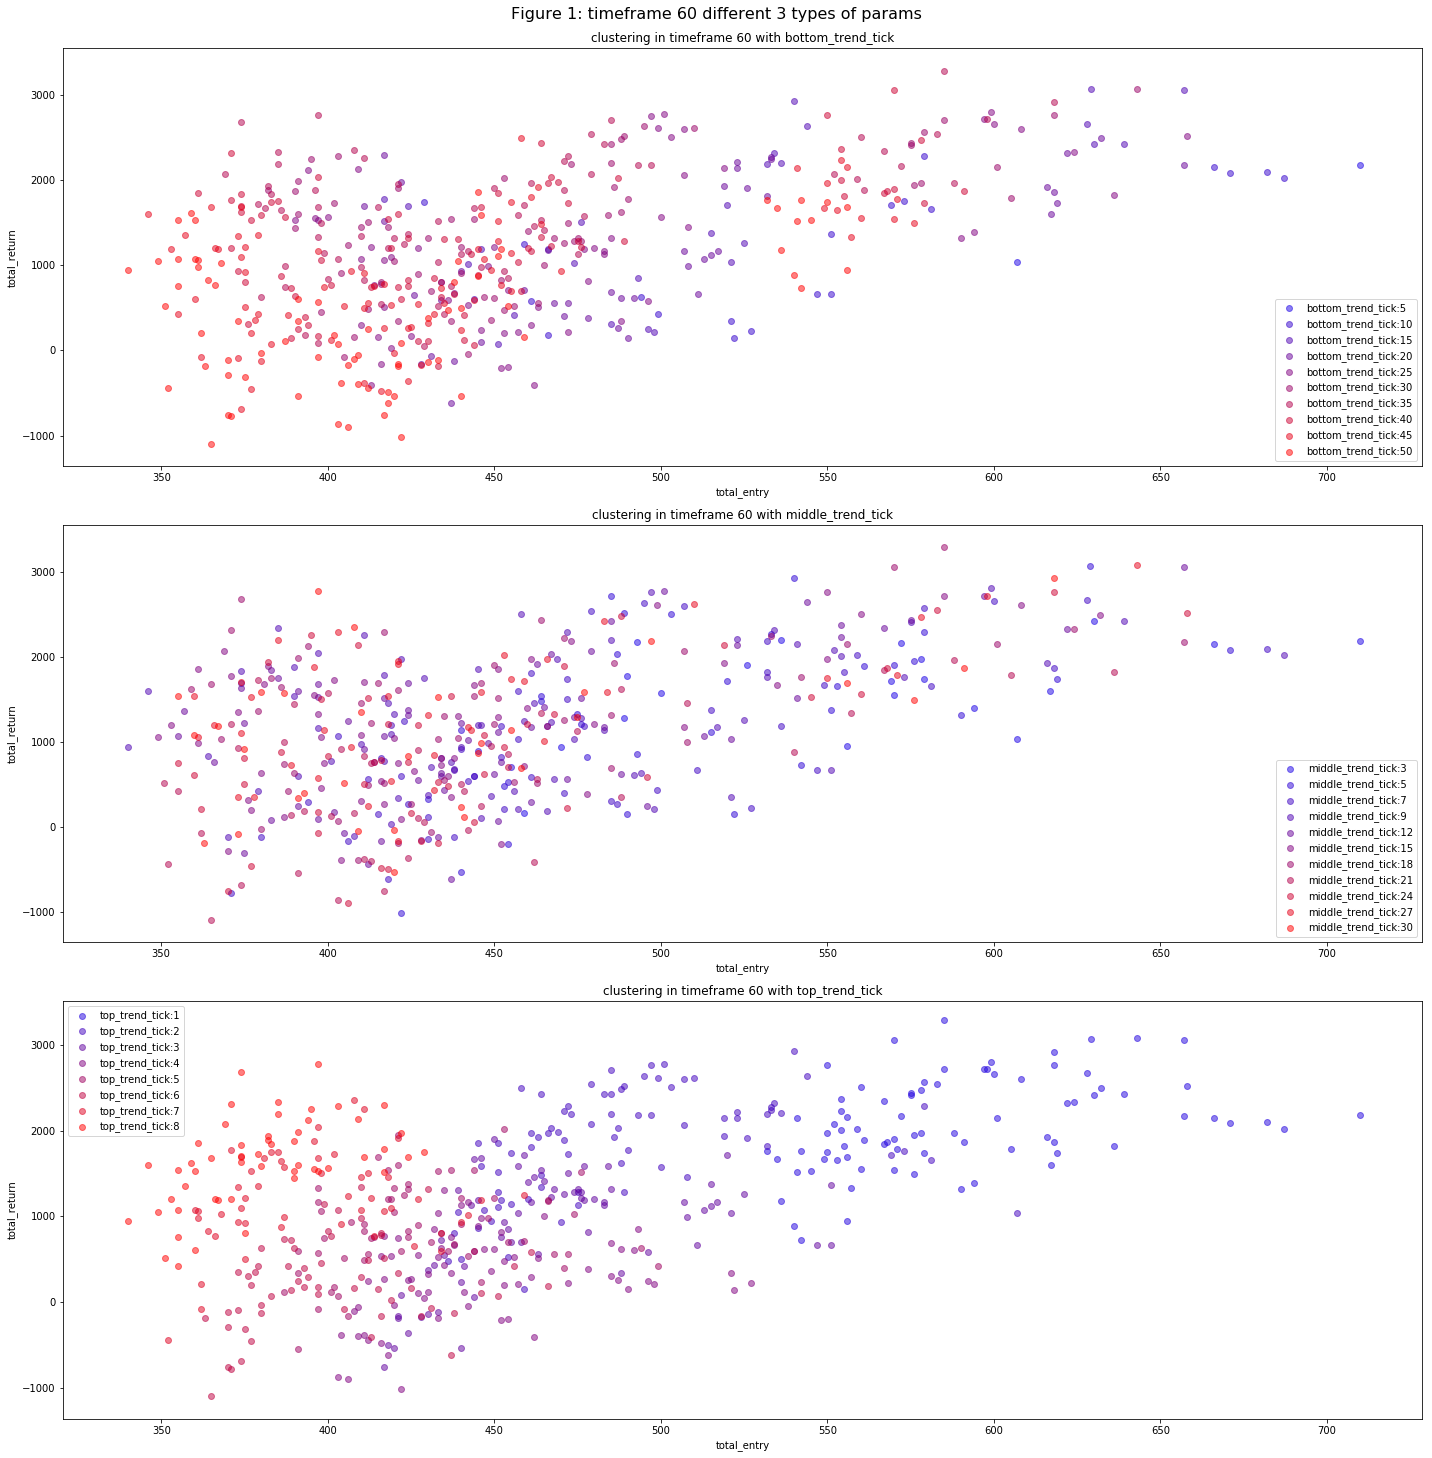

In [19]:
visualize_timeframe_clusters_with_xy_for_each_param(inversed_results, 
    60, "Figure 1: timeframe 60 different 3 types of params",
    "total_entry", "total_return")

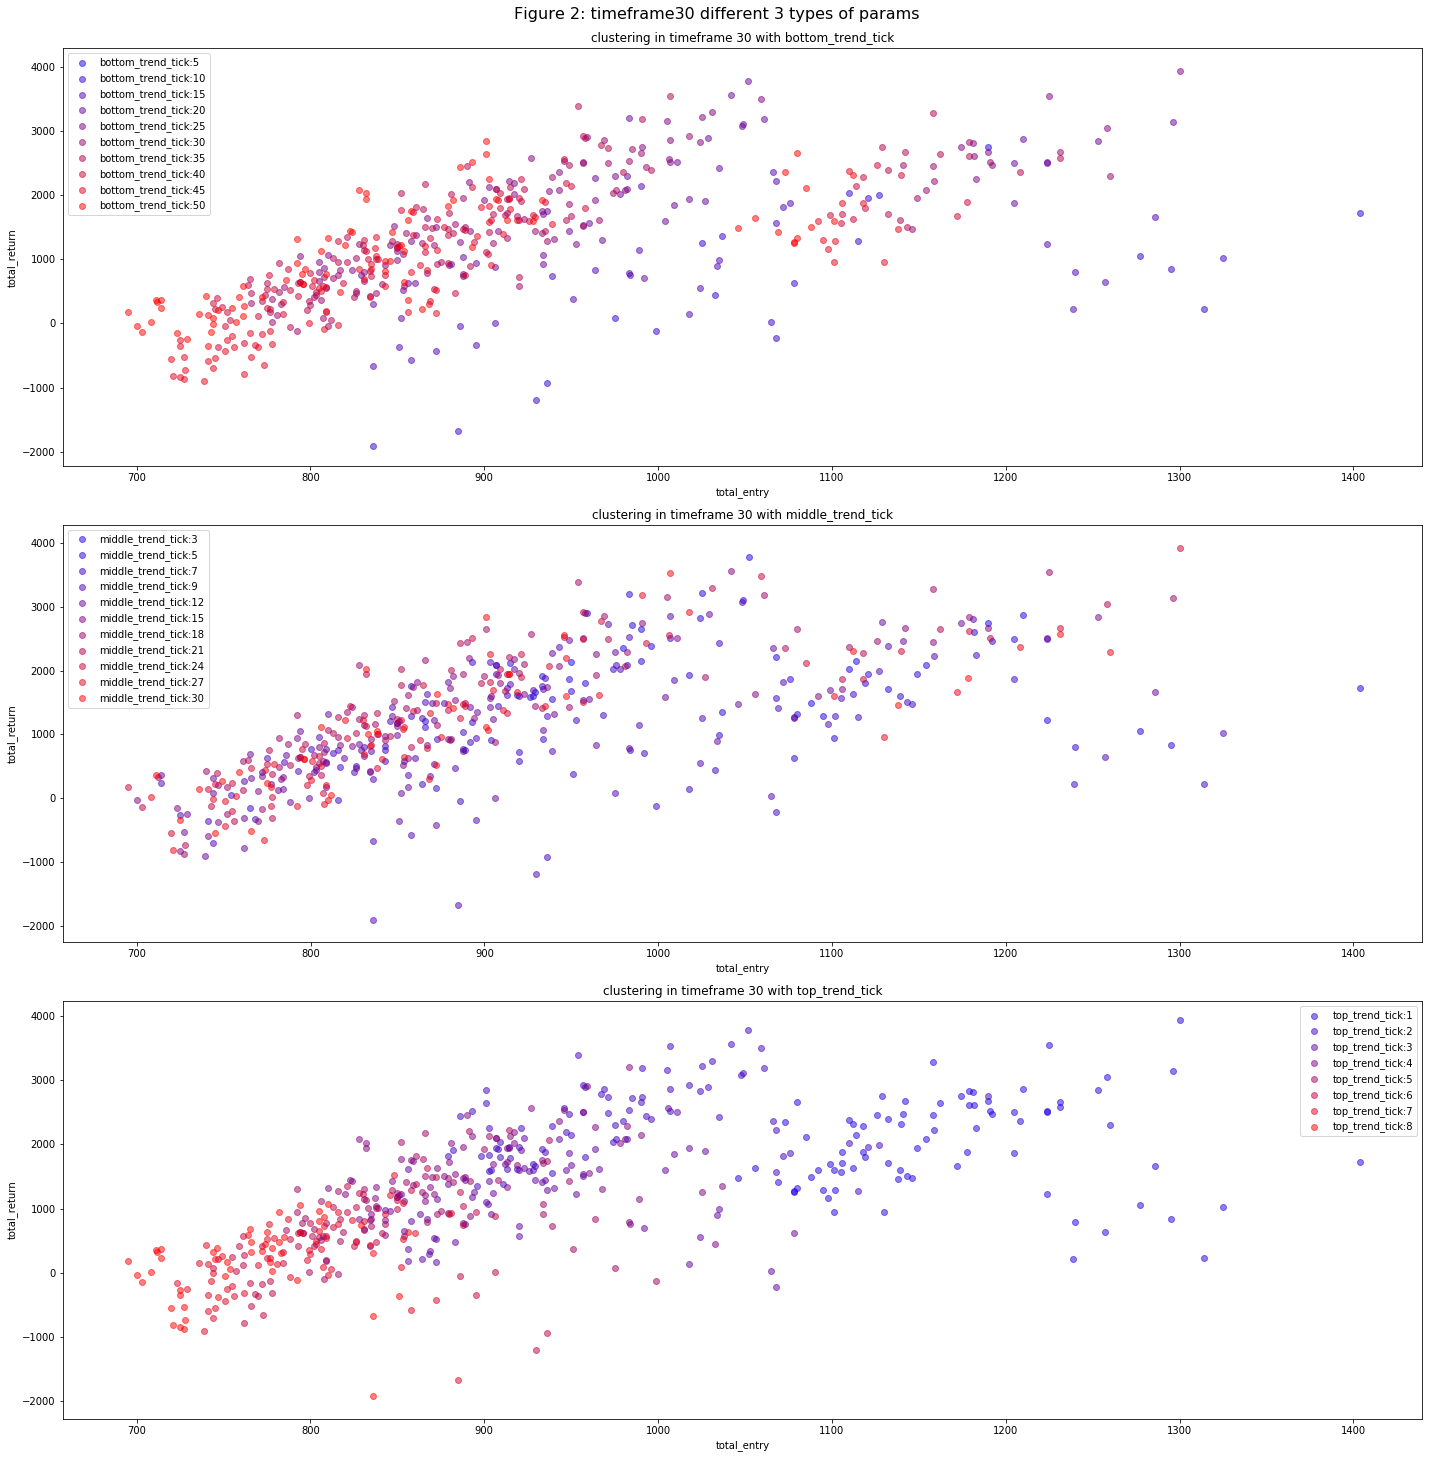

In [18]:
visualize_timeframe_clusters_with_xy_for_each_param(inversed_results, 
    30, "Figure 2: timeframe30 different 3 types of params",
    "total_entry", "total_return")

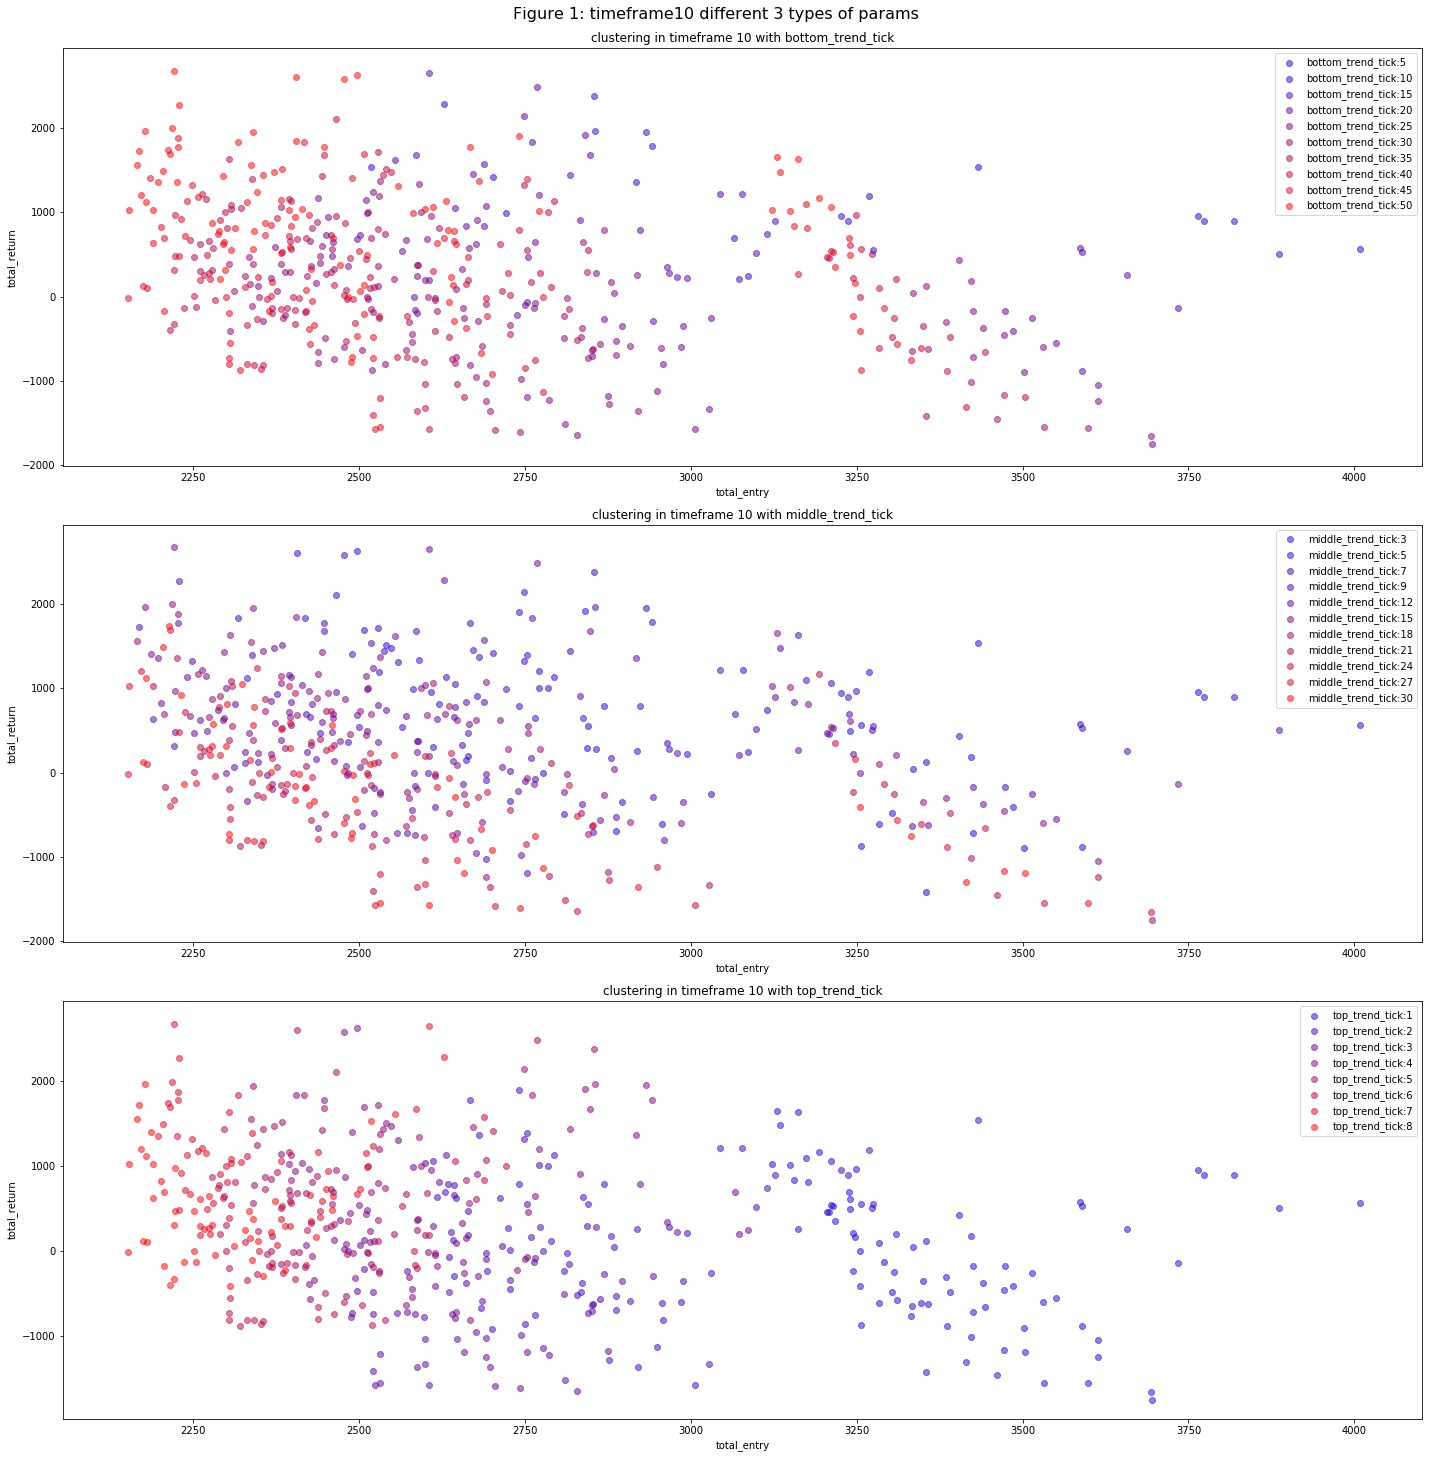

In [21]:
visualize_timeframe_clusters_with_xy_for_each_param(inversed_results, 
    10, "Figure 1: timeframe10 different 3 types of params",
    "total_entry", "total_return")

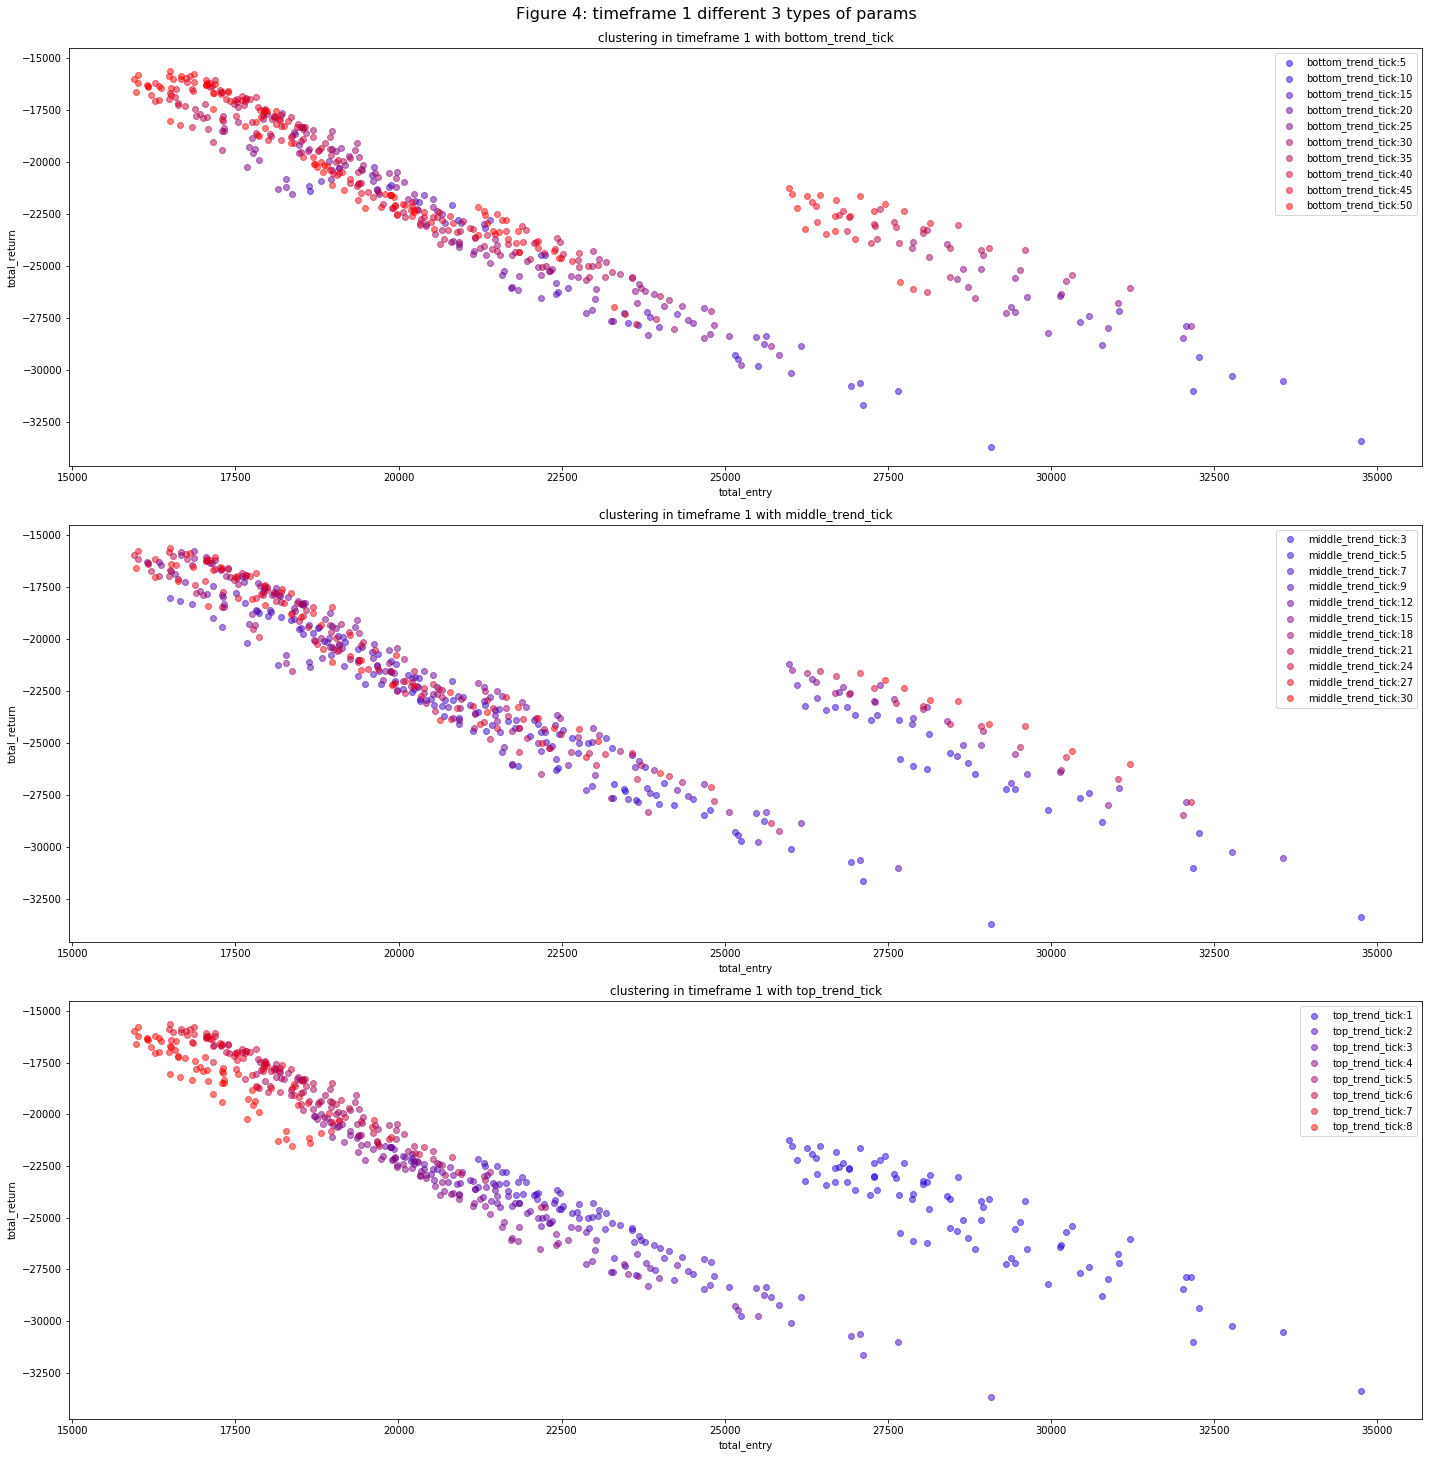

In [22]:
visualize_timeframe_clusters_with_xy_for_each_param(inversed_results, 
    1, "Figure 4: timeframe 1 different 3 types of params",
    "total_entry", "total_return")

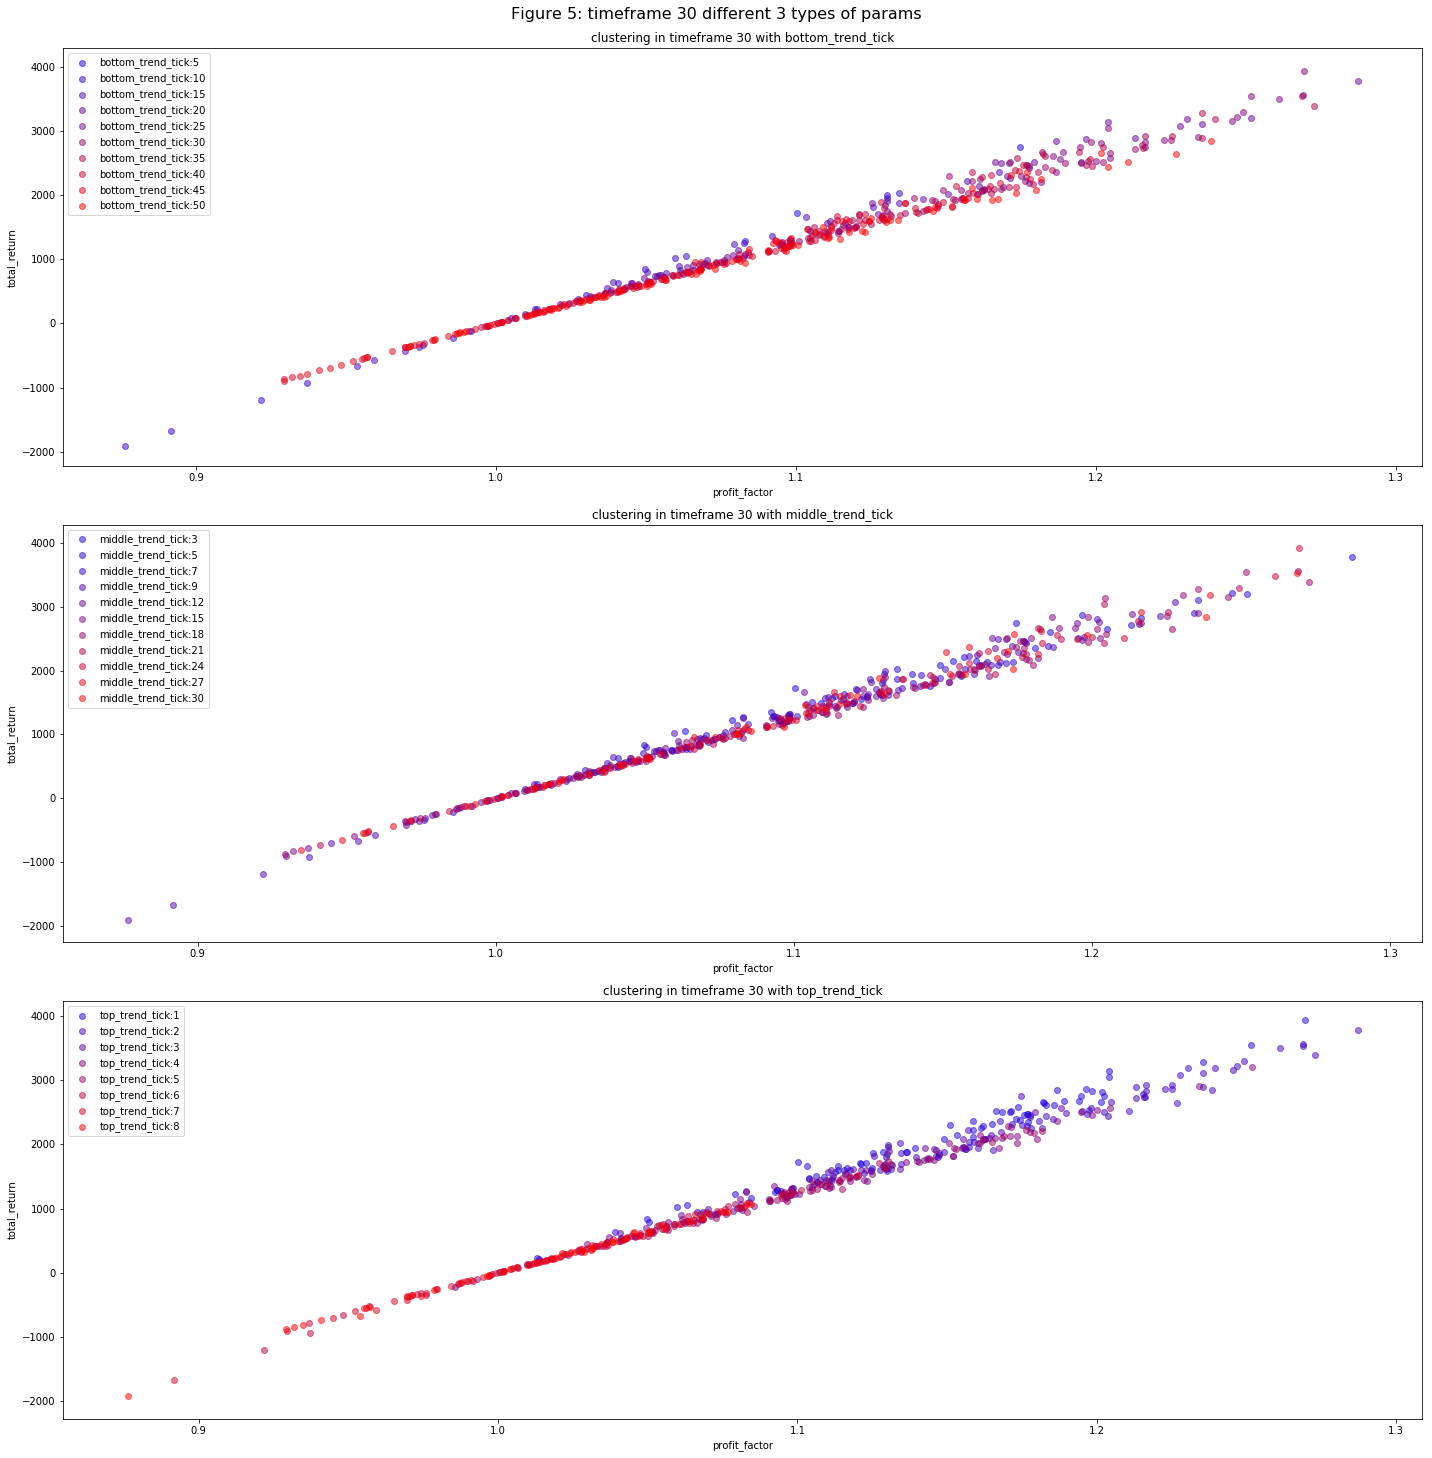

In [23]:
visualize_timeframe_clusters_with_xy_for_each_param(inversed_results, 
    30, "Figure 5: timeframe 30 different 3 types of params",
    "profit_factor", "total_return")

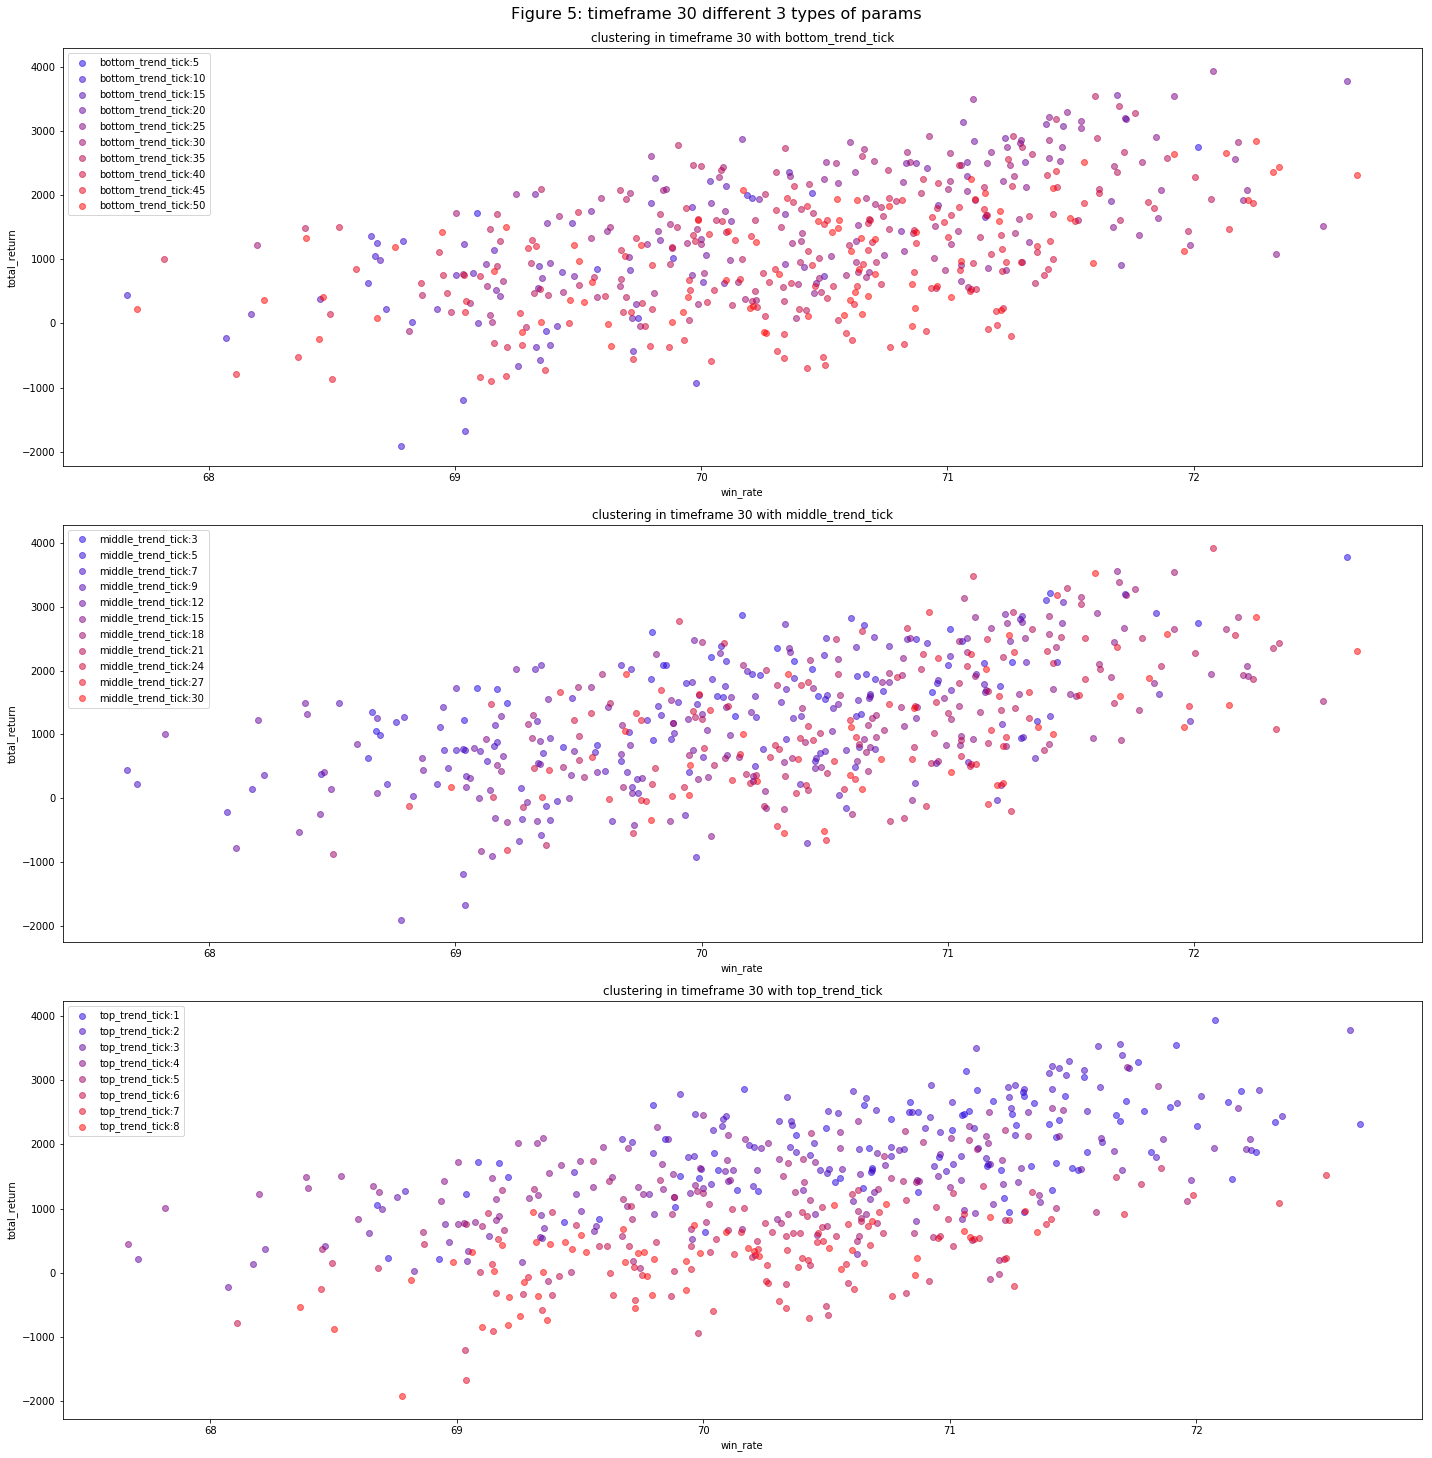

In [24]:
visualize_timeframe_clusters_with_xy_for_each_param(inversed_results, 
    30, "Figure 5: timeframe 30 different 3 types of params",
    "win_rate", "total_return")

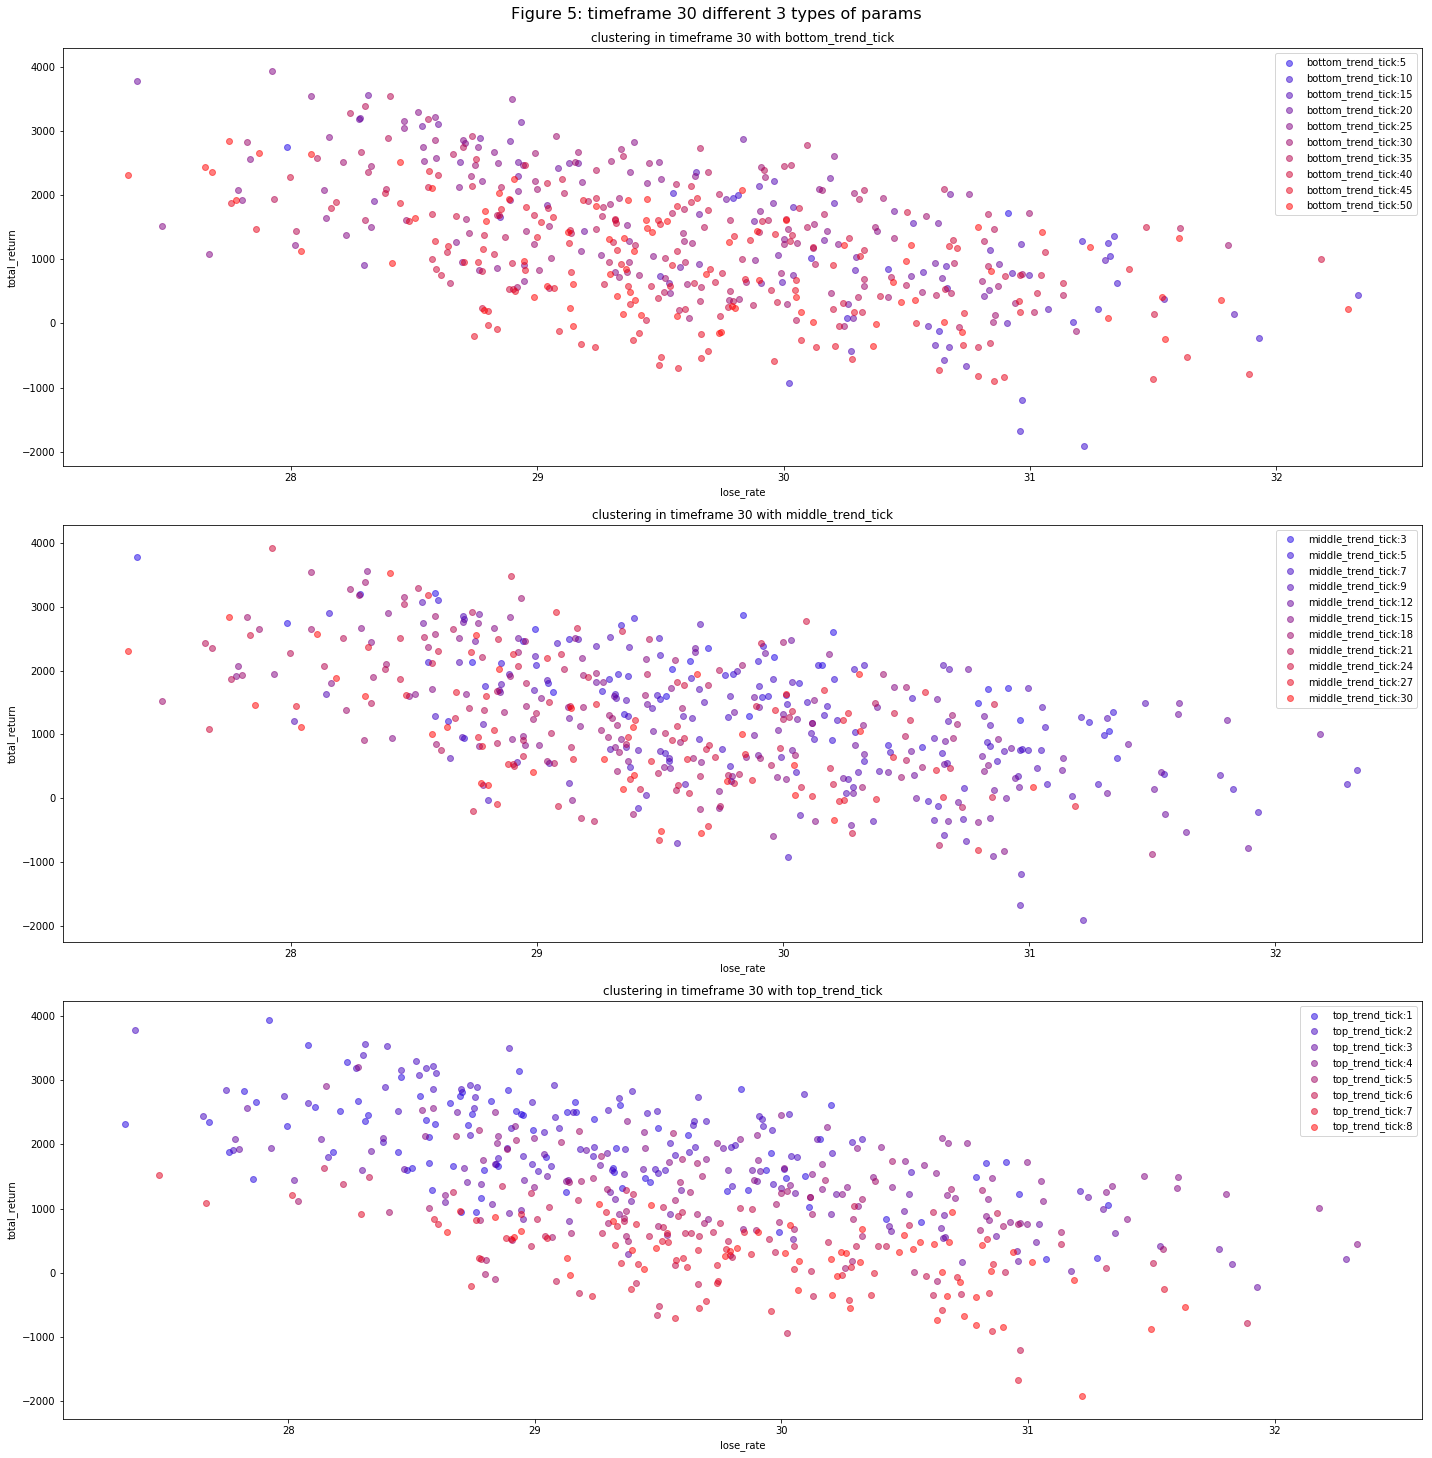

In [28]:
visualize_timeframe_clusters_with_xy_for_each_param(inversed_results, 
    30, "Figure 5: timeframe 30 different 3 types of params",
    "lose_rate", "total_return")

tick_param:1
intercept : [817.32648683]
coefficient : [[1.00959274]]
===
total_entry mean : 1166.3875
total_entry standard deviation : 72.79022986150778
total_return mean : 1994.9028374999998
total_return standard deviation : 732.5014995982307
R-squared : 0.010065180839026078
tick_param:2
intercept : [-599.9938486]
coefficient : [[3.02305657]]
===
total_entry mean : 976.575
total_entry standard deviation : 68.14035682213662
total_return mean : 2352.2476249999995
total_return standard deviation : 593.2861155393375
R-squared : 0.12055160216660653
Kormogorov Smirnov test
KS     :0.275
p-value:0.00453303060557918
p <= 0.05, These distribution have a difference
F-test
F:        1.524
p-value:  0.063
p > 0.05, Equal variance
t-test for equal veriance
t:        -3.391
p-value:  0.001
p < 0.05, The averages are different.


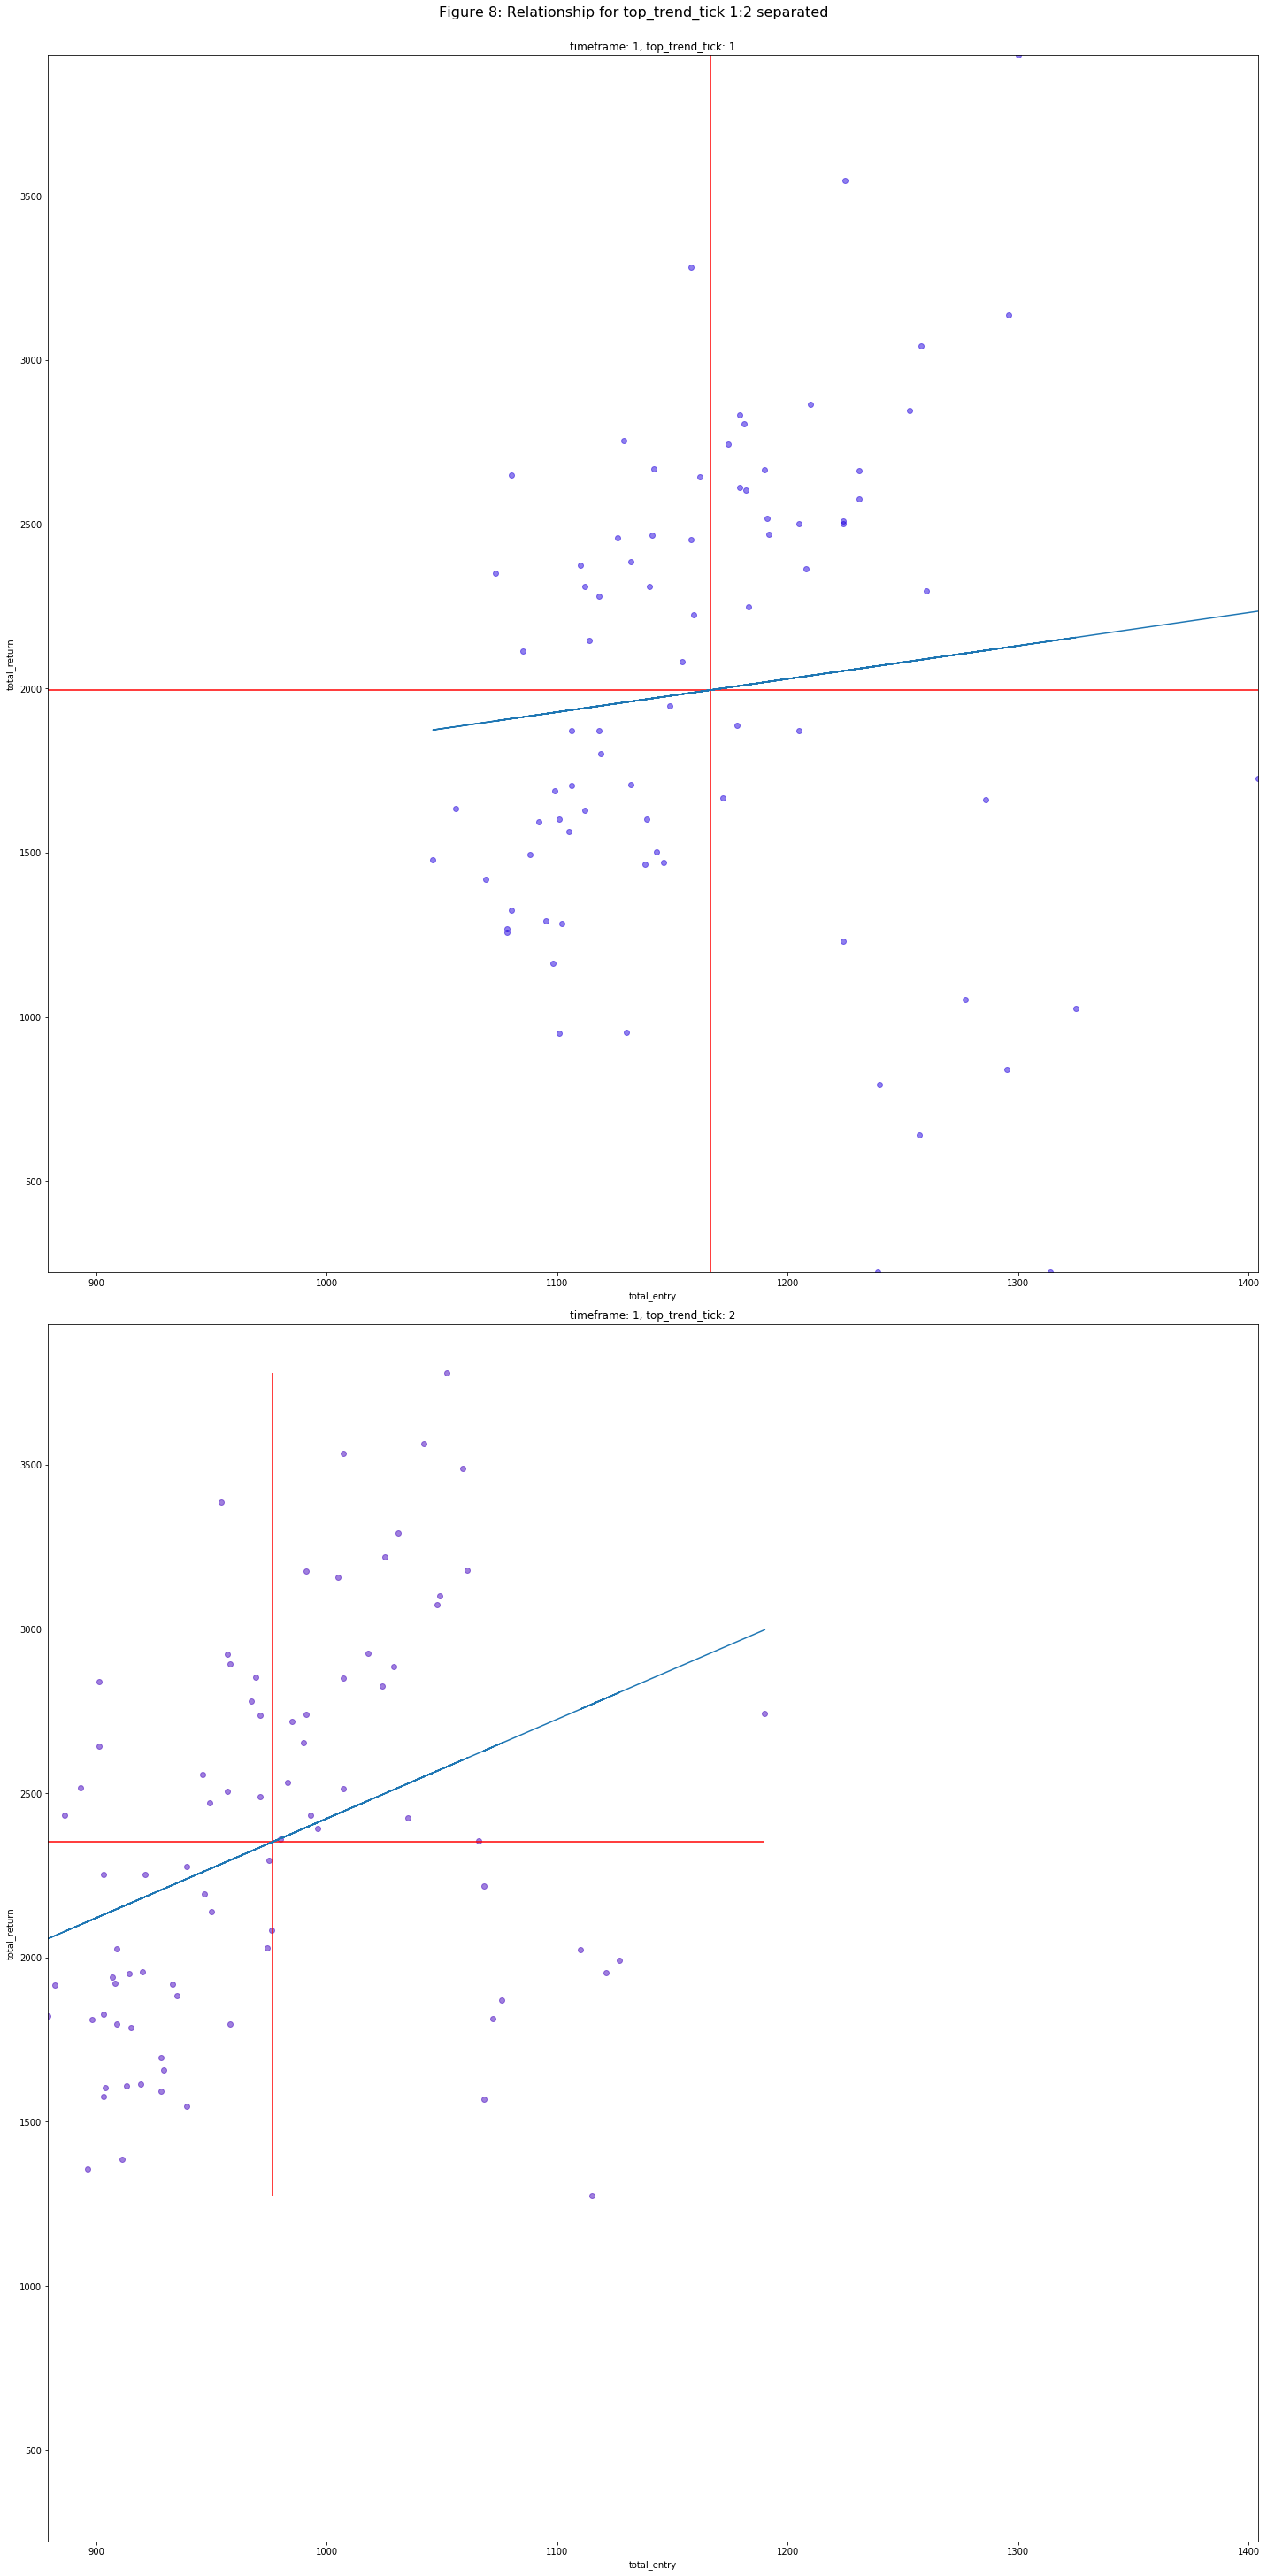

In [32]:
pickup_top_tick_with_xy(inversed_results, 30, "Figure 8: Relationship for top_trend_tick 1:2 separated", [1,2],
                "total_entry", "total_return", True)

tick_param:1
intercept : [-30414.26090881]
coefficient : [[457.13991161]]
===
win_rate mean : 70.89550250000002
win_rate standard deviation : 0.911775380535488
total_return mean : 1994.9028374999998
total_return standard deviation : 732.5014995982307
R-squared : 0.32378517974609167
tick_param:2
intercept : [-30522.23729332]
coefficient : [[464.02706881]]
===
win_rate mean : 70.84605
win_rate standard deviation : 0.7300047814998597
total_return mean : 2352.2476249999995
total_return standard deviation : 593.2861155393375
R-squared : 0.3259940482890454
Kormogorov Smirnov test
KS     :0.275
p-value:0.00453303060557918
p <= 0.05, These distribution have a difference
F-test
F:        1.524
p-value:  0.063
p > 0.05, Equal variance
t-test for equal veriance
t:        -3.391
p-value:  0.001
p < 0.05, The averages are different.


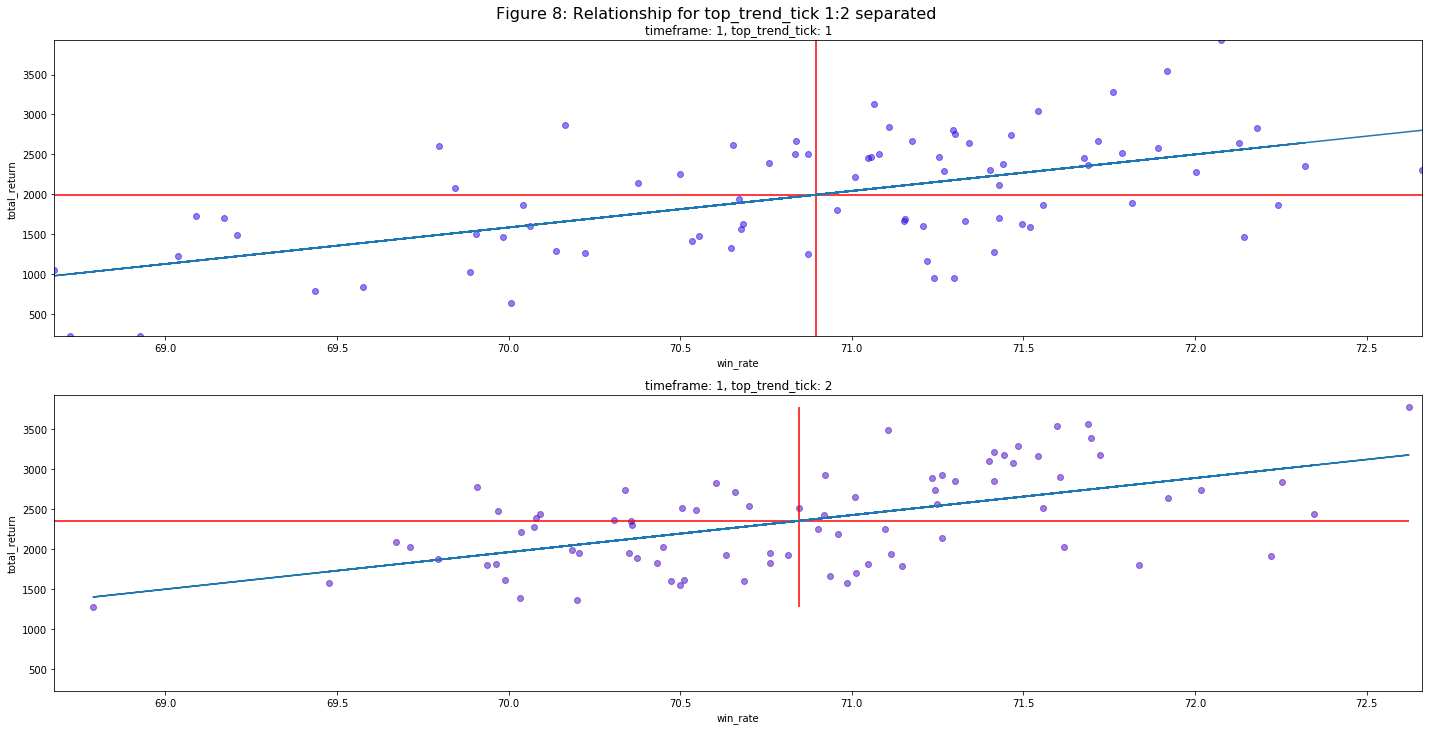

In [33]:
pickup_top_tick_with_xy(inversed_results, 30, "Figure 8: Relationship for top_trend_tick 1:2 separated", [1,2],
                "win_rate", "total_return", True)